In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import string

### Visualizing sampes from the EMNIST dataset

In [2]:
label_mapping = defaultdict(int)
uppercase_letters = set(map(ord, string.ascii_uppercase))
with open('data/emnist_mapping.txt') as file:
    for line in file:
        label, number = map(int, line.split(' '))
        if number in uppercase_letters:
            label_mapping[label] = chr(number)

In [3]:
label_mapping

defaultdict(int,
            {10: 'A',
             11: 'B',
             12: 'C',
             13: 'D',
             14: 'E',
             15: 'F',
             16: 'G',
             17: 'H',
             18: 'I',
             19: 'J',
             20: 'K',
             21: 'L',
             22: 'M',
             23: 'N',
             24: 'O',
             25: 'P',
             26: 'Q',
             27: 'R',
             28: 'S',
             29: 'T',
             30: 'U',
             31: 'V',
             32: 'W',
             33: 'X',
             34: 'Y',
             35: 'Z'})

In [4]:
data = pd.read_csv('data/emnist.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
indices_to_drop = data[(data.iloc[:,0] < 10) | (data.iloc[:,0] > 35)].index
data.drop(indices_to_drop, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,62400.00000,62400.0,62400.0,62400.0,62400.0,62400.000000,62400.000000,62400.000000,62400.000000,62400.00000,...,62400.000000,62400.0,62400.0,62400.000000,62400.000000,62400.0,62400.0,62400.0,62400.0,62400.0
mean,22.50000,0.0,0.0,0.0,0.0,0.002468,0.020641,0.035657,0.030978,0.03008,...,0.000561,0.0,0.0,0.003910,0.000513,0.0,0.0,0.0,0.0,0.0
std,7.50006,0.0,0.0,0.0,0.0,0.316018,1.641832,2.187832,2.150625,2.20448,...,0.140112,0.0,0.0,0.976782,0.128103,0.0,0.0,0.0,0.0,0.0
min,10.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,16.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22.50000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,29.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,35.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.00000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
data.iloc[:,0].value_counts()
# All classes are appearing an equal number of times

31    2400
30    2400
33    2400
34    2400
35    2400
10    2400
11    2400
12    2400
13    2400
14    2400
15    2400
16    2400
17    2400
18    2400
19    2400
20    2400
21    2400
22    2400
23    2400
24    2400
25    2400
26    2400
27    2400
28    2400
29    2400
32    2400
Name: 0, dtype: int64

In [10]:
label, pixel_values = data.iloc[:,0], data.iloc[:,1:]

In [11]:
label.head()

3     15
6     26
7     32
8     20
12    15
Name: 0, dtype: int64

In [12]:
pixel_values.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


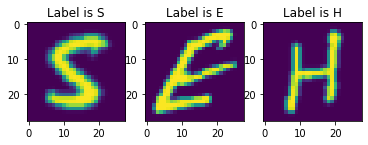

In [14]:
fig, axs = plt.subplots(ncols=3, squeeze=False)
indices = np.random.randint(low=0, high=len(data), size=3)
images = pixel_values.iloc[indices].to_numpy()
labels = label.iloc[indices].to_numpy()

for index, img in enumerate(images):
    pixels = img.reshape((28,28))
    pixels = np.fliplr(pixels)
    pixels = np.rot90(pixels)
    axs[0,index].title.set_text(f'Label is {label_mapping[labels[index]]}')
    axs[0,index].imshow(pixels)

In [16]:
data.to_csv('data/emnist_upper.csv', header=False)